In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 20)

import time


In [2]:
df1 = pd.read_csv("realStateData.csv")
df1.head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df1.shape

(923159, 12)

In [4]:
df1.groupby('state')['state'].agg('count')

state
Connecticut        91644
Delaware            2135
Georgia               50
Maine              36650
Massachusetts     175248
New Hampshire      51394
New Jersey        233722
New York          211778
Pennsylvania       17148
Puerto Rico        24679
Rhode Island       29596
South Carolina        25
Tennessee             20
Vermont            46460
Virgin Islands      2573
Virginia              31
West Virginia          3
Wyoming                3
Name: state, dtype: int64

In [5]:
df2 = df1.drop(['status', 'acre_lot', 'full_address', 'street', 'zip_code', 'sold_date'], axis= 'columns')
df2.head()

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,NaN


In [6]:
df2.isnull().sum()

price             71
bed           131703
bath          115192
city              74
state              0
house_size    297843
dtype: int64

In [7]:
# df2.fillna(df2['price'].median(), inplace=True)
df3 =df2.dropna()


In [8]:
df3.isnull().sum()

price         0
bed           0
bath          0
city          0
state         0
house_size    0
dtype: int64

In [9]:
df3.shape


(601978, 6)

In [10]:
df3["house_size"].unique()

array([  920.,  1527.,   748., ...,  5929., 20298.,  7497.])

In [11]:
df3["price"].unique()

array([  105000.,    80000.,    67000., ...,   399976.,   639990.,
       11800000.])

In [12]:
df3["city"].unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Rock Tavern',
       'Cornwall On Hudson', 'New Hamburg'], dtype=object)

In [13]:
df3['location'] = df3['city'].str.cat(df3['state'], sep=' ')

df3.head()

C:\Users\AB\AppData\Local\Temp/ipykernel_68/2969083209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['city'].str.cat(df3['state'], sep=' ')


,price,bed,bath,city,state,house_size,location
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0,Adjuntas Puerto Rico
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0,Adjuntas Puerto Rico
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0,Juana Diaz Puerto Rico
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0,Ponce Puerto Rico
5,179000.0,4.0,3.0,San Sebastian,Puerto Rico,2520.0,San Sebastian Puerto Rico


In [14]:
# Remove Spaces Leading & Trailing
# df2.location = df2.location.apply(lambda x : x.strip())

In [15]:
df4 = df3.copy()

In [16]:
df4.shape

(601978, 7)

In [17]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Boston Massachusetts        29926
New York City New York      27681
New York New York           24324
Brooklyn New York           15421
Bronx New York               9212
                            ...  
Maple Glen Pennsylvania         1
Matinicus Isle Plt Maine        1
Mongaup Valley New York         1
Moscow Maine                    1
Kenduskeag Maine                1
Name: location, Length: 2844, dtype: int64

In [18]:
# len(location_stats < 10)
df4.location.unique()

array(['Adjuntas Puerto Rico', 'Juana Diaz Puerto Rico',
       'Ponce Puerto Rico', ..., 'Rock Tavern New York',
       'Cornwall On Hudson New York', 'New Hamburg New York'],
      dtype=object)

In [19]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

df4.location = df4.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

df4.head()

,price,bed,bath,city,state,house_size,location
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0,Adjuntas Puerto Rico
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0,Adjuntas Puerto Rico
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0,Juana Diaz Puerto Rico
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0,Ponce Puerto Rico
5,179000.0,4.0,3.0,San Sebastian,Puerto Rico,2520.0,San Sebastian Puerto Rico


In [20]:
# df4.shape
df4.loc[9007]

price                       70000.0
bed                             2.0
bath                            1.0
city                      Naranjito
state                   Puerto Rico
house_size                    620.0
location      Naranjito Puerto Rico
Name: 9007, dtype: object

In [21]:
df4['price_per_sqft'] = df4['price'] / df4['house_size']
df4.head()

,price,bed,bath,city,state,house_size,location,price_per_sqft
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0,Adjuntas Puerto Rico,114.130435
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0,Adjuntas Puerto Rico,52.390308
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0,Juana Diaz Puerto Rico,89.572193
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0,Ponce Puerto Rico,80.555556
5,179000.0,4.0,3.0,San Sebastian,Puerto Rico,2520.0,San Sebastian Puerto Rico,71.031746


In [22]:
df4['price_per_sqft'].describe()

count    601978.000000
mean        466.599613
std        1073.727571
min           0.204583
25%         183.850575
50%         279.823270
75%         500.000000
max      358606.557377
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std))]

        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
        
    return df_out
        
df5 = remove_pps_outlier(df4)
df5.head()


,price,bed,bath,city,state,house_size,location,price_per_sqft
0,550000.0,3.0,2.0,Aberdeen,New Jersey,1998.0,Aberdeen New Jersey,275.275275
1,385000.0,2.0,3.0,Aberdeen,New Jersey,1284.0,Aberdeen New Jersey,299.844237
2,564900.0,4.0,3.0,Aberdeen,New Jersey,1860.0,Aberdeen New Jersey,303.709677
3,550000.0,3.0,3.0,Aberdeen,New Jersey,1883.0,Aberdeen New Jersey,292.087095
4,334900.0,3.0,3.0,Aberdeen,New Jersey,1254.0,Aberdeen New Jersey,267.065391


In [24]:
df5.shape

(445156, 8)

In [25]:
df5['price_per_sqft'].describe()

count    445156.000000
mean        442.019937
std         428.246411
min           5.689216
25%         189.433178
50%         278.352941
75%         500.912409
max        3146.341463
Name: price_per_sqft, dtype: float64

In [26]:
df5[df5.house_size / df5.bed < 300].head()

,price,bed,bath,city,state,house_size,location,price_per_sqft
153,229000.0,3.0,1.0,Abington,Pennsylvania,840.0,Abington Pennsylvania,272.619048
158,350000.0,4.0,2.0,Abington,Pennsylvania,1169.0,Abington Pennsylvania,299.401198
351,150000.0,2.0,1.0,Acton,Maine,485.0,Acton Maine,309.278351
352,150000.0,2.0,1.0,Acton,Maine,485.0,Acton Maine,309.278351
355,150000.0,2.0,1.0,Acton,Maine,485.0,Acton Maine,309.278351


In [27]:
# Bedroom size outlier remover
df6 = df5[~(df5.house_size / df5.bed < 300)]
df6.shape

(435428, 8)

In [28]:
df7 = df6.copy()
df7.head()

,price,bed,bath,city,state,house_size,location,price_per_sqft
0,550000.0,3.0,2.0,Aberdeen,New Jersey,1998.0,Aberdeen New Jersey,275.275275
1,385000.0,2.0,3.0,Aberdeen,New Jersey,1284.0,Aberdeen New Jersey,299.844237
2,564900.0,4.0,3.0,Aberdeen,New Jersey,1860.0,Aberdeen New Jersey,303.709677
3,550000.0,3.0,3.0,Aberdeen,New Jersey,1883.0,Aberdeen New Jersey,292.087095
4,334900.0,3.0,3.0,Aberdeen,New Jersey,1254.0,Aberdeen New Jersey,267.065391


In [29]:
len(df7[df7.bath > df7.bed + 1])

6865

In [30]:
df8 = df7[~(df7.bath > df7.bed + 1)]
# df8.shape

In [31]:
df8.head()

,price,bed,bath,city,state,house_size,location,price_per_sqft
0,550000.0,3.0,2.0,Aberdeen,New Jersey,1998.0,Aberdeen New Jersey,275.275275
1,385000.0,2.0,3.0,Aberdeen,New Jersey,1284.0,Aberdeen New Jersey,299.844237
2,564900.0,4.0,3.0,Aberdeen,New Jersey,1860.0,Aberdeen New Jersey,303.709677
3,550000.0,3.0,3.0,Aberdeen,New Jersey,1883.0,Aberdeen New Jersey,292.087095
4,334900.0,3.0,3.0,Aberdeen,New Jersey,1254.0,Aberdeen New Jersey,267.065391


In [32]:
df8['location'].unique()

array(['Aberdeen New Jersey', 'Abington Massachusetts',
       'Abington Pennsylvania', ..., 'York Maine',
       'Yorktown Heights New York', 'other'], dtype=object)

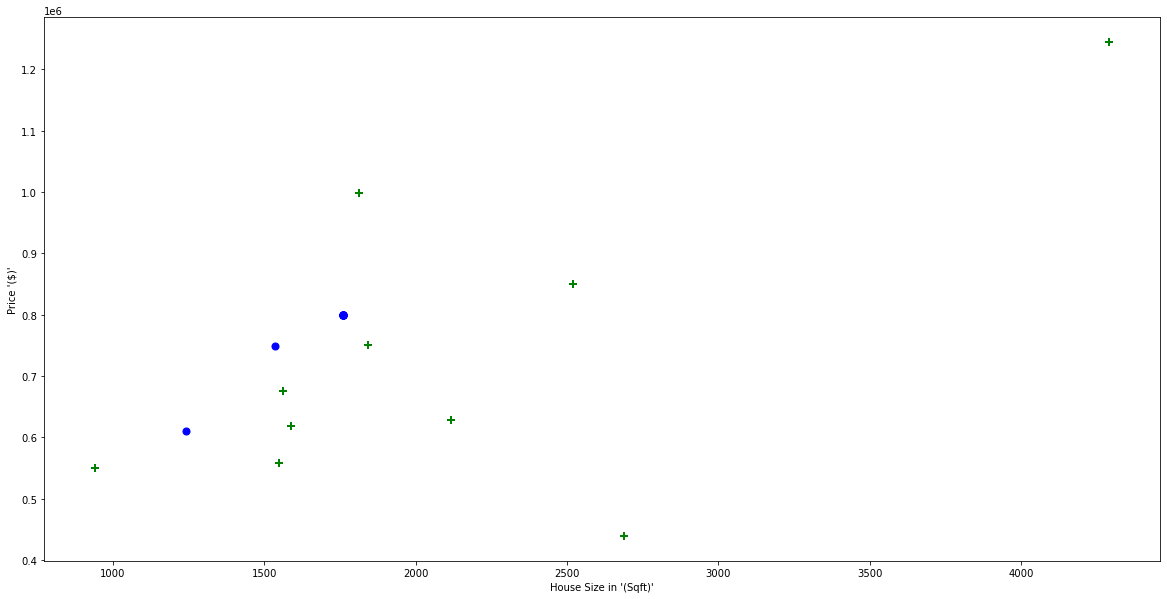

In [33]:
# Check Outlier like where 2bed price is higher than 3bed 
def scatter_plot(df, location):
    bed_2 = df[(df.location == location) & (df.bed == 2)]
    bed_3 = df[(df.location == location) & (df.bed == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bed_2.house_size, bed_2.price, color='blue', label='2 BED', s=50)
    plt.scatter(bed_3.house_size, bed_3.price, marker='+', color='green',  label='3 BED', s=50)
    plt.xlabel("House Size in '(Sqft)'")
    plt.ylabel("Price '($)'")
    plt.legend
    
    
scatter_plot(df8, 'York Maine')

In [34]:
# Remove Outlier like where 2bed price is higher than 3bed 

def remove_bed_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bed_stats = {}
        for bed, bed_df in location_df.groupby('bed'):
            bed_stats[bed] = {
                'mean'  : np.mean(bed_df.price_per_sqft),
                'std'   : np.std(bed_df.price_per_sqft),
                'count' : bed_df.shape[0]
            }
            
        for bed, bed_df in location_df.groupby('bed'):
            stats = bed_stats.get(bed -1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bed_df[bed_df.price_per_sqft < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

df9 = remove_bed_outlier(df8)
df9.shape


(259390, 8)

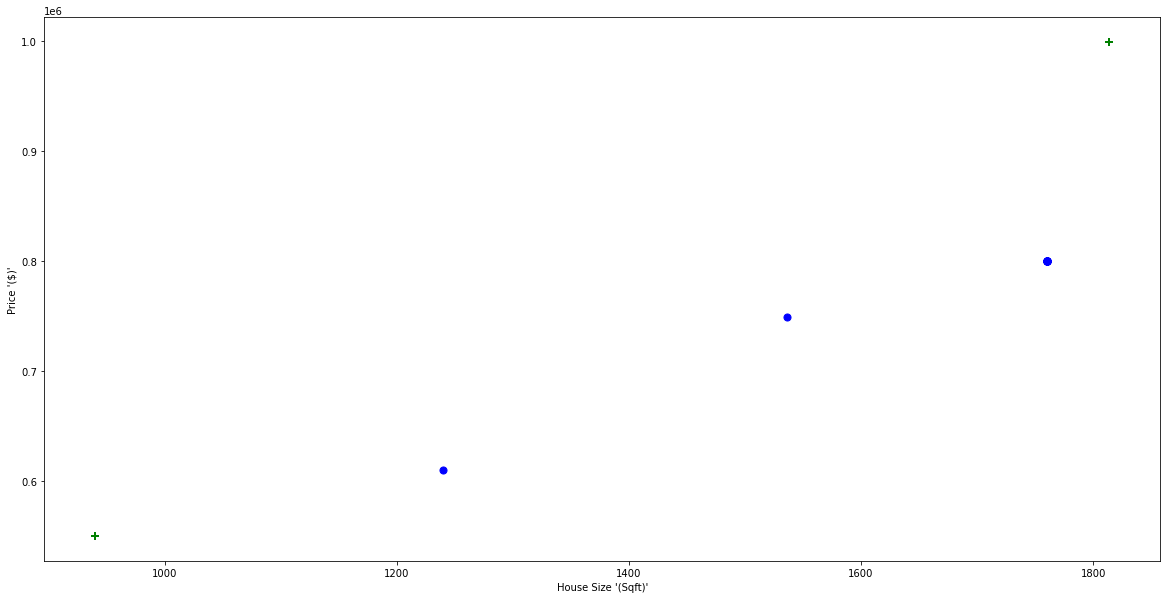

In [35]:
# Again verify/Check Outlier like where 2bed price is higher than 3bed 
def scatter_plot(df, location):
    bed_2 = df[(df.location == location) & (df.bed == 2)]
    bed_3 = df[(df.location == location) & (df.bed == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (20, 10)
    plt.scatter(bed_2.house_size, bed_2.price, color='blue', label='2 BED', s=50)
    plt.scatter(bed_3.house_size, bed_3.price, marker='+', color='green', label='3 BED', s=50)
    plt.xlabel("House Size '(Sqft)'")
    plt.ylabel("Price '($)'")
    plt.legend

scatter_plot(df9, 'York Maine')  

Text(0, 0.5, 'Count')

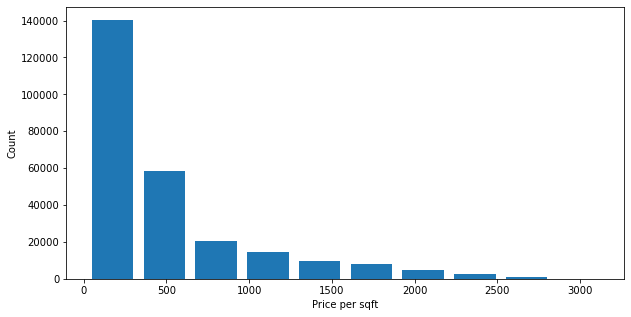

In [36]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')


In [37]:
df10 = df9.copy()
df10.shape

(259390, 8)

In [38]:
# String to OneHotEncoding bcz string cannt be use by model:- so convert to nmber
dummies = pd.get_dummies(df10.location)
dummies.head()

,Aberdeen New Jersey,Abington Massachusetts,Abington Pennsylvania,Absecon New Jersey,Acton Maine,Acton Massachusetts,Acushnet Massachusetts,Acworth New Hampshire,Adams Massachusetts,Addisleigh Park New York,...,Yardley Pennsylvania,Yarmouth Maine,Yarmouth Massachusetts,Yarmouth Port Massachusetts,Yauco Puerto Rico,Yeadon Pennsylvania,Yonkers New York,York Maine,Yorktown Heights New York,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,price,bed,bath,city,state,house_size,location,price_per_sqft,Aberdeen New Jersey,Abington Massachusetts,...,Yabucoa Puerto Rico,Yardley Pennsylvania,Yarmouth Maine,Yarmouth Massachusetts,Yarmouth Port Massachusetts,Yauco Puerto Rico,Yeadon Pennsylvania,Yonkers New York,York Maine,Yorktown Heights New York
1,385000.0,2.0,3.0,Aberdeen,New Jersey,1284.0,Aberdeen New Jersey,299.844237,1,0,...,0,0,0,0,0,0,0,0,0,0
2,564900.0,4.0,3.0,Aberdeen,New Jersey,1860.0,Aberdeen New Jersey,303.709677,1,0,...,0,0,0,0,0,0,0,0,0,0
3,550000.0,3.0,3.0,Aberdeen,New Jersey,1883.0,Aberdeen New Jersey,292.087095,1,0,...,0,0,0,0,0,0,0,0,0,0
6,300000.0,2.0,2.0,Aberdeen,New Jersey,1152.0,Aberdeen New Jersey,260.416667,1,0,...,0,0,0,0,0,0,0,0,0,0
7,300000.0,2.0,2.0,Aberdeen,New Jersey,1152.0,Aberdeen New Jersey,260.416667,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df12 = df11.drop(['city', 'state', 'location', 'price_per_sqft'], axis='columns')
df12.head()

,price,bed,bath,house_size,Aberdeen New Jersey,Abington Massachusetts,Abington Pennsylvania,Absecon New Jersey,Acton Maine,Acton Massachusetts,...,Yabucoa Puerto Rico,Yardley Pennsylvania,Yarmouth Maine,Yarmouth Massachusetts,Yarmouth Port Massachusetts,Yauco Puerto Rico,Yeadon Pennsylvania,Yonkers New York,York Maine,Yorktown Heights New York
1,385000.0,2.0,3.0,1284.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,564900.0,4.0,3.0,1860.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,550000.0,3.0,3.0,1883.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,300000.0,2.0,2.0,1152.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,300000.0,2.0,2.0,1152.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df12.shape

(259390, 2271)

In [42]:
X = df12.drop(['price'], axis='columns')
X.head()

,bed,bath,house_size,Aberdeen New Jersey,Abington Massachusetts,Abington Pennsylvania,Absecon New Jersey,Acton Maine,Acton Massachusetts,Acushnet Massachusetts,...,Yabucoa Puerto Rico,Yardley Pennsylvania,Yarmouth Maine,Yarmouth Massachusetts,Yarmouth Port Massachusetts,Yauco Puerto Rico,Yeadon Pennsylvania,Yonkers New York,York Maine,Yorktown Heights New York
1,2.0,3.0,1284.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,1860.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1883.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,2.0,1152.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.0,2.0,1152.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y = df12.price
y

1         385000.0
2         564900.0
3         550000.0
6         300000.0
7         300000.0
            ...   
445145    479000.0
445149    599900.0
445151    560000.0
445152    625000.0
445155    799000.0
Name: price, Length: 259390, dtype: float64

In [44]:
# Method 1 to split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [57]:
from sklearn.linear_model import LinearRegression

start = time.time()

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_accuracy = lr.score(X_test, y_test)

end = time.time()

print(lr_accuracy)
print((end - start), "sec")

0.6646074483933984
95.09166979789734 sec


In [46]:
# Method 2
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)



In [47]:
from sklearn.linear_model import LinearRegression

start = time.time()

lrr = LinearRegression()
lrr_accuracy = np.mean(cross_val_score(lr, X, y, cv=cv))

end = time.time()

print(lrr_accuracy)
print((end - start) * 10**3, "ms")

0.6643261798803953
1234883.0833435059 ms


In [61]:
# Predict Price
def predict_price(bed, bath, house_size, location ):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bed
    x[1] = bath
    x[2] = house_size
    
    if loc_index > 1:
        x[loc_index] = 1
        
    return lr.predict([x])[0]

In [64]:
X.columns

Index(['bed', 'bath', 'house_size', 'Aberdeen New Jersey',
       'Abington Massachusetts', 'Abington Pennsylvania', 'Absecon New Jersey',
       'Acton Maine', 'Acton Massachusetts', 'Acushnet Massachusetts',
       ...
       'Yabucoa Puerto Rico', 'Yardley Pennsylvania', 'Yarmouth Maine',
       'Yarmouth Massachusetts', 'Yarmouth Port Massachusetts',
       'Yauco Puerto Rico', 'Yeadon Pennsylvania', 'Yonkers New York',
       'York Maine', 'Yorktown Heights New York'],
      dtype='object', length=2270)

In [73]:
predict_price(bed=4, bath=3, house_size=1000, location='Aberdeen New Jersey')

249864.1883342784

In [76]:
predict_price(bed=6, bath=3, house_size=1000, location='Aberdeen New Jersey')

131082.45996568375

In [67]:
predict_price(5, 3, 1000, 'Yeadon Pennsylvania')

92333.82803726906

In [49]:
# from sklearn.linear_model import Lasso
# import numpy as np

# np.mean(cross_val_score(Lasso(), X, y, cv=cv))

In [50]:
# from sklearn.linear_model import Ridge

# np.mean(cross_val_score(Ridge(), X, y, cv=cv))

In [51]:
# Insufficient Memory Error.....
'''
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
ridge.score(X_test, y_test)'''


'\nfrom sklearn.linear_model import LogisticRegression\n\nlogReg = LogisticRegression()\nlogReg.fit(X_train, y_train)\nridge.score(X_test, y_test)'